# ***Credit Risk Model Analysis***

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score ,log_loss, roc_auc_score,precision_recall_curve, recall_score,auc, precision_score,average_precision_score ,f1_score, classification_report , plot_roc_curve,plot_confusion_matrix,roc_curve,plot_precision_recall_curve

from sklearn.linear_model import LogisticRegression

In [ ]:
#reading the dataset
df=pd.read_excel('Dataset_CreditScoring.xlsx')

**Understanding the Data and the Dataset**

In [ ]:
# shows count of rows and columns
df.shape

(3000, 30)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [ ]:
#shows first few rows of the dataframe
df.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [ ]:
#Couting the number of good and bad loans
df['TARGET'].value_counts() #1 is for Bad loans and 0 is for Good loans

0    2500
1     500
Name: TARGET, dtype: int64

In [ ]:
#data summary across good loan(0) & bad loan(1)
df.groupby('TARGET').mean()

,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,TLCnt12,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1.3224,0.7664,0.1492,2.9424,3.174638,3.2896,173.002,11.650,0.2844,1.832,...,3.986711,0.628177,0.544963,0.6044,0.6624,2.2236,0.502376,1.180,0.8648,0.556867
1,1.9680,1.3100,0.1740,3.9380,2.775459,4.8820,155.672,12.992,0.2280,1.768,...,4.533870,0.748185,0.385173,1.3340,1.5760,4.0140,0.465127,2.554,2.0860,0.600978


**Data Pre-processing**

In [ ]:
#dropping customer ID column from the dataset
df=df.drop('ID',axis=1)
df.shape

(3000, 29)

In [ ]:
df.columns

Index(['TARGET', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06',
       'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast',
       'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum',
       'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt',
       'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24',
       'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24',
       'TLOpen24Pct'],
      dtype='object')

In [ ]:
df.describe()

,TARGET,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,0.275000,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,0.582084,...,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,0.000000,...,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,0.000000,...,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,0.000000,...,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,7.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


In [ ]:
# explore missing values
df.isna().sum()

TARGET               0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [ ]:
# filling missing values with mean
df=df.fillna(df.mean())

In [ ]:
# explore missing values post missing value fix
df.isna().sum()

TARGET             0
DerogCnt           0
CollectCnt         0
BanruptcyInd       0
InqCnt06           0
InqTimeLast        0
InqFinanceCnt24    0
TLTimeFirst        0
TLTimeLast         0
TLCnt03            0
TLCnt12            0
TLCnt24            0
TLCnt              0
TLSum              0
TLMaxSum           0
TLSatCnt           0
TLDel60Cnt         0
TLBadCnt24         0
TL75UtilCnt        0
TL50UtilCnt        0
TLBalHCPct         0
TLSatPct           0
TLDel3060Cnt24     0
TLDel90Cnt24       0
TLDel60CntAll      0
TLOpenPct          0
TLBadDerogCnt      0
TLDel60Cnt24       0
TLOpen24Pct        0
dtype: int64

**Exploratory Data Analysis**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c523477d0>,
      dtype=object)

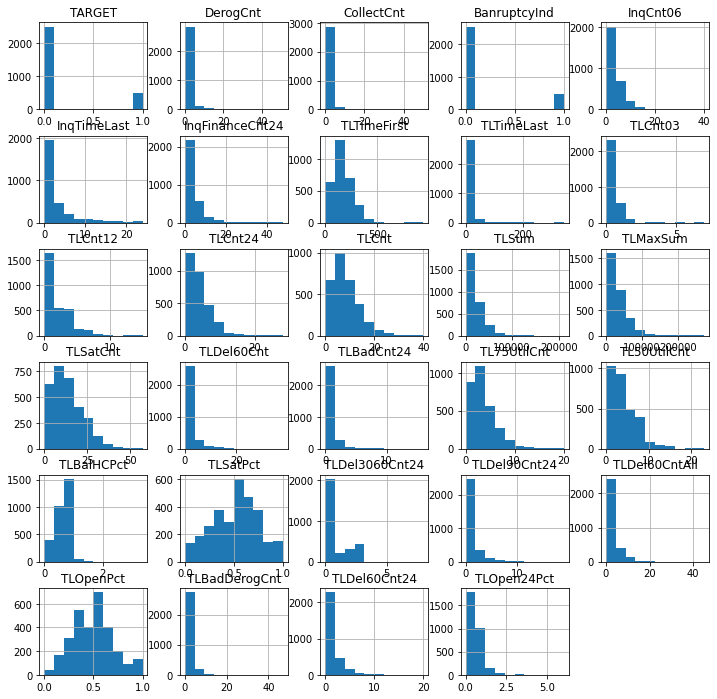

In [ ]:
#Plotting Histograms for each attribute
df.hist(figsize=(12,12))

In [ ]:
#Plotting Heatmap for the dataset
plt.figure(figsize=(20,20),dpi=300)
ax=sns.heatmap(df.corr(),annot=True)

**Feature Engineering**

Feature Extraction

In [ ]:
y = df.iloc[:, 0].values
X = df.iloc[:, 1:29].values

Splitting Data


In [ ]:
# splitting dataset into training and test (in ratio 80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[ 5.    ,  5.    ,  0.    , ...,  5.    ,  0.    ,  0.4   ],
       [ 1.    ,  0.    ,  1.    , ...,  0.    ,  0.    ,  1.25  ],
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  0.2353],
       ...,
       [ 3.    ,  2.    ,  1.    , ...,  5.    ,  3.    ,  2.125 ],
       [12.    , 12.    ,  0.    , ..., 16.    ,  4.    ,  0.6   ],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  2.    ,  0.5714]])

In [ ]:
X_test

array([[ 5.    ,  5.    ,  0.    , ..., 14.    , 13.    ,  0.1333],
       [ 1.    ,  1.    ,  0.    , ...,  2.    ,  1.    ,  0.6667],
       [ 0.    ,  0.    ,  0.    , ...,  1.    ,  1.    ,  0.3333],
       ...,
       [ 0.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  1.    ],
       [ 0.    ,  0.    ,  0.    , ...,  5.    ,  7.    ,  0.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  0.5   ]])

Normalizing/Scaling the Data

In [ ]:
#Normalizing/Scaling the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Applying Logistic Regression Algorithm**

This is the best algorithm used for prediction of good loan and bad loan for the finance companies/banks


In [ ]:
#Building Logistic Regression Model
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Confusion Matrix: 
 [[482  16]
 [ 88  14]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


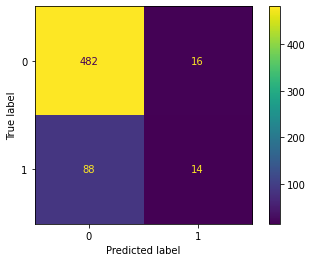

In [ ]:
#Confusion Matrix for Logistic Regression
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))
plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
#Accuracy for Logistic Model
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.8266666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


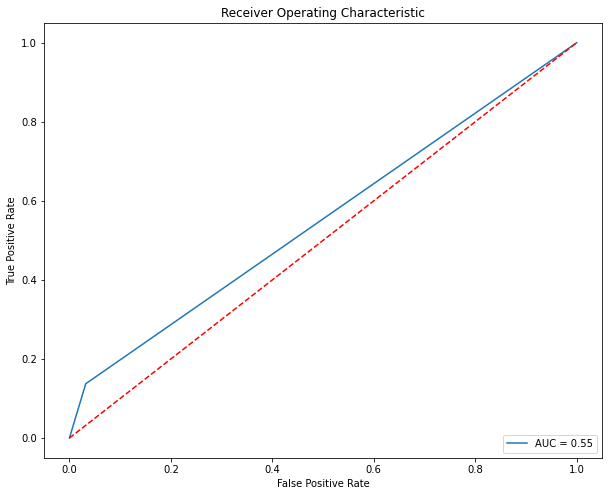

In [ ]:
#Plotting the ROC Curve for the Logistic Model
from sklearn.metrics import auc,roc_curve
fpr,tpr,_ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operating Characteristic')
sns.lineplot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


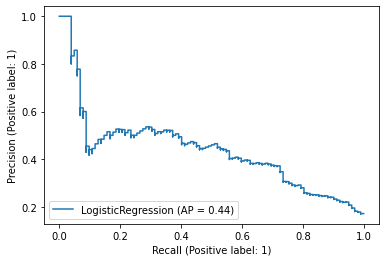

In [ ]:
#Plotting the precision recall curve for the logistic model 
plot_precision_recall_curve(classifier, X_test, y_test)

Analyzing the Model Applied

In [ ]:
#Analyzing Logistic Regression model applied
test_prob = classifier.predict_proba(X_test)[:, 1]
test_pred = classifier.predict(X_test)

print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.38656
AUC = 0.77384
Average Precision = 0.43796

Using 0.5 as threshold:
Accuracy = 0.82667
Precision = 0.46667
Recall = 0.13725
F1 score = 0.21212

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       498
           1       0.47      0.14      0.21       102

    accuracy                           0.83       600
   macro avg       0.66      0.55      0.56       600
weighted avg       0.78      0.83      0.79       600



In [ ]:
#predicting the good loan and bad loan scores for the test set 
predictions = classifier.predict_proba(X_test)
predictions

array([[0.04043521, 0.95956479],
       [0.93779812, 0.06220188],
       [0.7116222 , 0.2883778 ],
       ...,
       [0.97060955, 0.02939045],
       [0.4548394 , 0.5451606 ],
       [0.86724904, 0.13275096]])

Producing the Output in User Readable Format:-


*   writing the good loan and the bad loan scores 
*   the predicted overall score if the loan is a good loan or a bad loan

*   the actual outcome 






In [ ]:
# writing model output file
df_prediction_prob = pd.DataFrame(predictions, columns = ['probGL_0', 'probBL_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET']) #1 for Bad loan and 0 for Good loan
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome']) #1 for Bad loan and 0 for Good loan

dfx=pd.concat([df_prediction_prob, df_prediction_target,df_test_dataset], axis=1) 

dfx.to_csv("Credit_Model_Prediction.csv", sep=',', encoding='UTF-8')

dfx.head()

,probGL_0,probBL_1,predicted_TARGET,Actual Outcome
0,0.040435,0.959565,1,1
1,0.937798,0.062202,0,0
2,0.711622,0.288378,0,0
3,0.906753,0.093247,0,0
4,0.877058,0.122942,0,0
